<a href="https://colab.research.google.com/github/ShahZebYousafzai/Deep-Learning-Basics/blob/main/5_Transefer_Learning(Feature_Extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transefer_Learning(Feature_Extraction)

[Transfer learning](https://en.wikipedia.org/wiki/Transfer_learning#:~:text=Transfer%20learning%20(TL)%20is%20a,when%20trying%20to%20recognize%20trucks.) is leveraging a working model's existing architecture and learned patterns for our own problem

The premise of Transfer Learning is a deep leearning network architecture of some kind that learns patterns/weights from a similar problem space and then in our case we want to use the patterns/weights on our specific problems.

## Why use transfer learning?
* We can laverage an existing neural network architecture **proven to work** on problems similar to our own.
* We can leverage a working network architecture which has **already learned patterns** on similar data to our own (often results in great results with less data).

In [1]:
# Check if we are using a GPU
!nvidia-smi

Thu Oct 14 13:38:26 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.74       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Download and becoming one with the data

In [2]:
# Get data (10% of 10 food classes from Food101)
import zipfile

# Download data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2021-10-14 13:42:17--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.202.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   170MB/s    in 0.9s    

2021-10-14 13:42:18 (170 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
# How many images in each folder?
import os

# Walk through 10 percent data directory and list number of files
for (dirpath, dirnames, filenames) in os.walk("/content/10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/10_food_classes_10_percent
There are 10 directories and 0 images in /content/10_food_classes_10_percent/train
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/fried_rice
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/ramen
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/ice_cream
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/chicken_wings
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/steak
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/chicken_curry
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/sushi
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/pizza
There are 0 directories and 75 images in /content/10_food_classes_10_percent/train/grilled_salmon
There 

In [5]:
# Get classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("10_food_classes_10_percent/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from subdirectories
class_names = class_names[1:]
print(class_names)

['chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger' 'ice_cream'
 'pizza' 'ramen' 'steak' 'sushi']


In [6]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target directory (We'll view images from here)
  target_folder = target_dir + "/" +target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # Show the shape of the image

  return img

Image shape: (512, 512, 3)


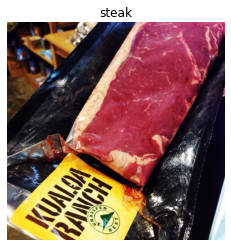

In [7]:
# View a random image from training dataset
img = view_random_image(target_dir="10_food_classes_10_percent/train", target_class="steak")

Image shape: (512, 512, 3)


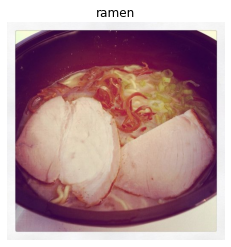

In [8]:
# View a random image from training dataset
img = view_random_image(target_dir="10_food_classes_10_percent/train", target_class="ramen")

## Create data loaders (preparing the data)

We'll use the `ImageDataGenerator` class to load in our images in batches

In [10]:
# Setup data inputs
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

print("Training images:")
train_data_10_percent = train_datagen.flow_from_directory(train_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

print("Testing images:")
test_data_10_percent = test_datagen.flow_from_directory(test_dir,
                                                          target_size=IMAGE_SHAPE,
                                                          batch_size=BATCH_SIZE,
                                                          class_mode="categorical")

Training images:
Found 750 images belonging to 10 classes.
Testing images:
Found 2500 images belonging to 10 classes.


## Setting up callbacks (things to run whilst our model trains)

[Callbacks](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback) are extra helpful functionality you can add to your models to be performed during or after training. 

Some of the most popular callbacks are:

* Tracking experiments with the Tensorboard `callback`
* Model checkpoint with the ModelCheckpoint `callback`
* Stopping a model from training (before it trains too long and overfits) with the EarlyStopping `callback`

In [28]:
# Create Tensorboard callback (functionized because we need to create a new one for each model)
import datetime

def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

> 🔑 **Note:** You can customize the directory where your TensorBoard logs (nodel training metrics) get saved to whatever you like. The `log_dir` parameter we've created above is only one option.

## Creating models using TensorFlow Hub

In the past, we've used Tensorflow to create our own moodels layer by layer from scratch.

Now, we're going to do a similar process, except the majority of our model's layers are going to come from TensorFlow Hub.

We can access pretrained model on: https://tfhub.dev/

Browsing the Tensorflow Hub page and sorting for image classification, we found the following feature vector model link: https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [12]:
# Let's compare the following two models
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [13]:
# Import dependencies
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [19]:
# Let's make a create_model() function to create a model from a URL
def create_model(model_url, num_classes=10):
  """
  Takes a Tensorflow Hub URL and create a Keras Sequential model with it
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL
    num_classes (int): Number of output neurons in the output layer,
      should be equal to number of target classes, default 10

  Returns:
    An uncompiled Keras Sequentialmodel with model_url as
    feature extractor layer and Dense output layer with num_classes output neurons.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False,
                                           name="feature_extraction_layer", # Freeze the already learned patterns  
                                           input_shape=IMAGE_SHAPE+(3,))
  
  # Create our own model
  model = tf.keras.Sequential([
                               feature_extractor_layer,
                               layers.Dense(num_classes, activation="softmax", name="output_layer")
  ])

  return model

### Creating and testing [ResNET](https://arxiv.org/abs/1512.03385) Tensorflow Hub Feature Extraction model

In [20]:
resnet_model = create_model(resnet_url,
                            num_classes=train_data_10_percent.num_classes)

In [22]:
# Compile our resnet model
resnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

In [29]:
# Let's fit our ResNet model to the data (10 percent of 10 classes)
history = resnet_model.fit(train_data_10_percent,
                           epochs=5,
                           steps_per_epoch=len(train_data_10_percent),
                           validation_data=test_data_10_percent,
                           validation_steps=len(test_data_10_percent),
                           callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="resnet50v2")])

Saving TensorBoard log files to: tensorflow_hub/resnet50v2/20211014-155407
Epoch 1/5
24/24 [==============================] - 59s 1s/step - loss: 1.9907 - accuracy: 0.3373 - val_loss: 1.2158 - val_accuracy: 0.6196
Epoch 2/5
24/24 [==============================] - 22s 922ms/step - loss: 0.9020 - accuracy: 0.7307 - val_loss: 0.8608 - val_accuracy: 0.7196
Epoch 3/5
24/24 [==============================] - 22s 938ms/step - loss: 0.6198 - accuracy: 0.8280 - val_loss: 0.7515 - val_accuracy: 0.7576
Epoch 4/5
24/24 [==============================] - 22s 929ms/step - loss: 0.4831 - accuracy: 0.8813 - val_loss: 0.6967 - val_accuracy: 0.7752
Epoch 5/5
24/24 [==============================] - 22s 932ms/step - loss: 0.3833 - accuracy: 0.9200 - val_loss: 0.6769 - val_accuracy: 0.7816


😱 Wow!

That is incredible! Our transfer learning feature extractor model out performed [ALL of previous models](https://github.com/ShahZebYousafzai/Deep-Learning-Basics/blob/main/4_CNN_and_Computer_Vision.ipynb) we built by hand... (substantially) and in a quicker training time AND only with 10% of the training examples.

In [34]:
# Let's create a function to plot our loss curves
# Tidbit: you could put a function like this into a script called "helper.py" and import it when you need it...
import matplotlib.pyplot as plt


def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics

  Args:
    history: Tensorflow History object.

  Returns:
    Plot of training/validation loss and accuracy metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs have we run

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

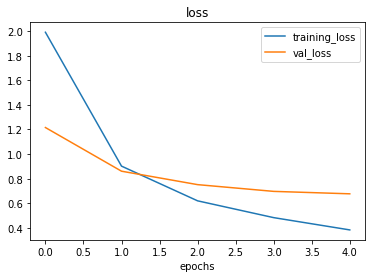

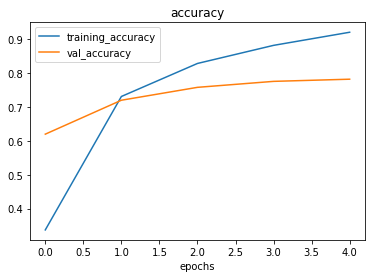

In [35]:
plot_loss_curves(history)

Our model is overfitting. So, let's try `EfficientNetB0` feature extractor model and compare it with `ResNet50v2`.

### Creating and testing [EfficientNetB0](https://arxiv.org/abs/1905.11946) Tensorflow Hub Feature Extraction model

In [41]:
# Create model
efficientnet_model = create_model(efficientnet_url,
                            num_classes=train_data_10_percent.num_classes)

# Compile our resnet model
efficientnet_model.compile(loss="categorical_crossentropy",
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["accuracy"])

# Let's fit our ResNet model to the data (10 percent of 10 classes)
history = efficientnet_model.fit(train_data_10_percent,
                           epochs=5,
                           steps_per_epoch=len(train_data_10_percent),
                           validation_data=test_data_10_percent,
                           validation_steps=len(test_data_10_percent),
                           callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", experiment_name="efficientnetb0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetb0/20211014-162256
Epoch 1/5
24/24 [==============================] - 33s 980ms/step - loss: 1.7989 - accuracy: 0.4707 - val_loss: 1.2603 - val_accuracy: 0.7472
Epoch 2/5
24/24 [==============================] - 19s 818ms/step - loss: 1.0446 - accuracy: 0.7707 - val_loss: 0.8516 - val_accuracy: 0.8204
Epoch 3/5
24/24 [==============================] - 19s 816ms/step - loss: 0.7457 - accuracy: 0.8347 - val_loss: 0.6918 - val_accuracy: 0.8436
Epoch 4/5
24/24 [==============================] - 19s 822ms/step - loss: 0.6042 - accuracy: 0.8520 - val_loss: 0.6087 - val_accuracy: 0.8528
Epoch 5/5
24/24 [==============================] - 19s 824ms/step - loss: 0.5103 - accuracy: 0.8867 - val_loss: 0.5555 - val_accuracy: 0.8592


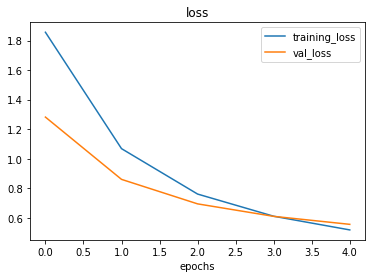

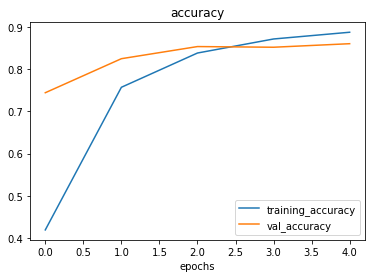

In [39]:
plot_loss_curves(history)

If we look at the loss curve we can see that the loss curves are getting close and if we train it for a little longer we might get improved results.

In [43]:
# how many layers does our efficientnetb0 feature extractor have?
len(efficientnet_model.layers[0].weights)

309

## Different types of transfer learning

* **"As is" transfer learning** - using an existing model with no changes what so ever (e.g. using [ImageNet](https://www.image-net.org/) modelon 1000 ImageNet classes, none of your own)
* **"Feature Extraction" transfer learning** - use the prelearned patterns of an existing model (e.g. EfficientNetB0 trained on ImageNet0 and adjust the output layer for your own problem (e.g. 1000 classes -> 10 classes of food)
* **"Fine-tuning" transfer learning** - use the prelearned patterns of an existing model and "fine-tune" many or all of the underlying layers (including new output layers


## Comparing our models results using Tensorboard

You can check what TensorBoard is in https://www.tensorflow.org/tensorboard.

> 🔑 **Note:** When you upload things to TensorBoard.dev, your experiments are public. So if you're running private experiments (things you don't want others to see) do not upload them to TensorBoard.dev

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./tensorflow_hub/ \
--name "EfficientNetB0 vs. ResNet50v2" \
--description "Comparing two different TF Hub feature extraction model architectures using 10% of the training data" \
--one_shot

Our TensorBoard experiments are uplaoded publically here: https://tensorboard.dev/experiment/j8hwlMP7QvSyrqJQ2qwRGw/

In [45]:
# Checkout what TensorBoard experiments you have
!tensorboard dev list

2021-10-14 17:01:12.730799: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-14 17:01:12.739801: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-14 17:01:12.740283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
https://tensorboard.dev/experiment/j8hwlMP7QvSyrqJQ2qwRGw/
	Name                 EfficientNetB0 vs. ResNet50v2
	Description          Comparing two different TF Hub feature extraction model architectures using 10% of the training data
	Id                   j8hwlMP7QvSyrqJQ2qwRGw
	Created              2021-10-14 16:55:36 (5 minutes ago)
	Up

In [ ]:
# Delete an experiment
# !tensorboard dev delete --experiment_id j8hwlMP7QvSyrqJQ2qwRGw

In [ ]:
# # Confirm the deletion by re-checking what experiments you have left
# !tensorboard dev list